In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction import stop_words

In [2]:
entree = "data/1___Lost/01/01__Pilot_(1).txt" #premier episode de Lost
fichier = open(entree, "r")
lignes = fichier.readlines()
fichier.close()
texte = ""
for ligne in lignes :
    if ligne[0] not in "0123456789":
        texte += ligne

#print(texte)

In [3]:
corpus = [texte]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
dico1 = vectorizer.get_feature_names()
#print(dico1)
#print(X.toarray())
print(len(dico1))

505


In [4]:
import nltk
nltk.set_proxy('https://proxy:3128')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/Etu8/3416148/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /users/Etu8/3416148/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
corpus = [texte]
nltk_sw = set(stopwords.words('english'))
sklearn_sw = set(stop_words.ENGLISH_STOP_WORDS)
stopwords_set = nltk_sw | sklearn_sw
l_mots = ["don", "yeah", "hey", "okay"]
for mot in l_mots :
    stopwords_set.add(mot)
#stopwords_set = list(stopwords_set)
vectorizer = CountVectorizer(stop_words = stopwords_set)
X = vectorizer.fit_transform(corpus)
dico2 = vectorizer.get_feature_names()
nb_occ = X.toarray()[0]
#print(dico2)
#print(X.toarray())

print(len(dico2))

352


In [31]:
#liste des stop_words rencontres dans le texte
l = []
for mot in dico1 :
    if mot not in dico2:
        l.append(mot)

l

['about',
 'after',
 'again',
 'all',
 'am',
 'an',
 'and',
 'any',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'as',
 'at',
 'back',
 'be',
 'been',
 'behind',
 'but',
 'by',
 'call',
 'can',
 'could',
 'couldn',
 'did',
 'didn',
 'do',
 'does',
 'doing',
 'don',
 'down',
 'eight',
 'enough',
 'ever',
 'every',
 'few',
 'find',
 'fire',
 'first',
 'five',
 'for',
 'four',
 'from',
 'front',
 'get',
 'give',
 'go',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hey',
 'him',
 'how',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'just',
 'keep',
 'last',
 'least',
 'll',
 'made',
 'many',
 'may',
 'me',
 'might',
 'more',
 'move',
 'must',
 'my',
 'myself',
 'name',
 'neither',
 'never',
 'next',
 'no',
 'not',
 'now',
 'of',
 'off',
 'okay',
 'on',
 'one',
 'only',
 'our',
 'out',
 'over',
 'please',
 're',
 'see',
 'seem',
 'serious',
 'she',
 'should',
 'shouldn',
 'six',
 'so',
 'some',
 'something',
 'still',
 'take',
 'than',
 'that',
 'the',
 'then',
 'th

#### Les n mots les plus présents dans le premier épisode de Lost

,Word,Nb_occ
0,help,21
1,come,16
2,know,15
3,good,11
4,right,10
5,like,9
6,transceiver,8
7,need,8
8,charlie,7
9,jack,7


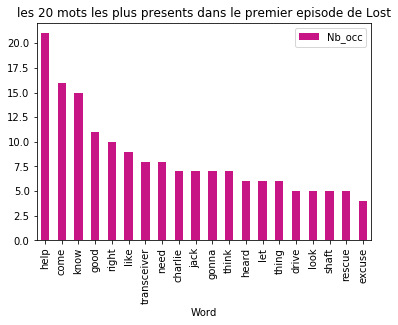

In [32]:
n = 20
ind = np.argpartition(nb_occ, -n)[-n:]
ind = ind[np.argsort(-nb_occ[ind])]
words = [dico2[i] for i in ind]

words_count = []
i = 0
for i in range(len(words)):
    words_count.append(nb_occ[ind[i]])
    
df = pd.DataFrame(np.column_stack([words, words_count]), columns=['Word', 'Nb_occ'])
df.Nb_occ=pd.to_numeric(df.Nb_occ)

titre = "les "+str(n)+" mots les plus presents dans le premier episode de Lost"
hist = df.plot(kind='bar', x='Word', y='Nb_occ', color='mediumvioletred', title =titre).get_figure()
path_fig = "img/"+titre+'.png'
hist.savefig(path_fig,  bbox_inches="tight")
df